# CLASIFICACIÓN DE TICKETS

In [8]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import pandas as pd

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
print(tf.__version__)

2.3.0


### EXTRACCIÓN DE TICKETS

In [55]:
#select relavant columns
df = pd.read_excel("tickets.xlsx")
df.head(10)

,DESCRIPCIÓN_DETALLADA,NOMBRE_SISTEMA
0,Pueden revisar mi equipo de com...,Administración de puestos de servicios
1,​Estimado Misael Solicito de tu valioso apoyo...,Lineas de Captura
2,actividad de realizar un respaldo de base de ...,Bases de Datos SQL
3,"al momento de exportar a Excel, el registro d...",Sistema Integral de Recursos del SAE (Recursos...
4,Ana Lilia Rodriguez Jimenez;​ SOLICITA SE LE ...,Perfil de Impresión
5,Andreida Yamilet Lagunas Osorio;​ por este me...,Soporte a usuarios
6,Angela Murillo Duarte; ​​Configuración de mul...,Multifuncional
7,Arter Jovany Mena Trejo;​​Solicita se envie e...,Soporte a usuarios
8,Brenda Viridiana Campos Galindo;​ SOLICITA PE...,Correo electrónico
9,BRENDABUEN DIA Me puedes apoyar en ver por q...,Soporte a usuarios


### PREPARAR LOS DATOS

In [56]:
# convertir nombre sistema a números
sentiment_label = df.NOMBRE_SISTEMA.factorize()

In [57]:
print(sentiment_label)

(array([ 0,  1,  2, ..., 18,  0,  4], dtype=int64), Index(['Administración de puestos de servicios', 'Lineas de Captura',
       'Bases de Datos SQL',
       'Sistema Integral de Recursos del SAE (Recursos Financieros y Materiales)',
       'Perfil de Impresión', 'Soporte a usuarios', 'Multifuncional',
       'Correo electrónico', 'Sistema de Viáticos del SAE - VIATISAE',
       'Citrix', 'Subastas Electrónicas', 'Análisis de Infraestructura TIC',
       'Nuevo Sistema de Bases de Datos de Bienes',
       'Sistema Integral de Administración de Bienes', 'Servidores WINDOWS',
       'Servidores UNIX', 'Control de Accesos Cuentas', 'Red local',
       'Equipo telefónico', 'Reclutamiento y Pruebas Psicológicas',
       'Red inalámbrica', 'Subastas',
       'Sistema Integral de Recursos del SAE (Recursos Humanos)', 'IntraSAE',
       'Servicios de SharePoint', 'Bases de Datos ORACLE',
       'Indicadores DERET (BI)', 'Sistema Organización de Expedientes',
       'Conciliaciones Financieras'

In [58]:
descripcion = df.DESCRIPCIÓN_DETALLADA.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(descripcion)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(descripcion)
padded_sequence = pad_sequences(encoded_docs, maxlen=300)

In [59]:
print(tokenizer.word_index)

{'de': 1, 'la': 2, 'el': 3, 'que': 4, 'en': 5, 'a': 6, 'para': 7, 'del': 8, 'se': 9, 'y': 10, 'usuario': 11, 'solicita': 12, '\u200b': 13, 'con': 14, 'los': 15, 'al': 16, 'pgr': 17, 'su': 18, 'apoyo': 19, 'por': 20, 'no': 21, '\u200bse': 22, 'las': 23, 'contraseña': 24, 'me': 25, 'ya': 26, 'siab': 27, 'equipo': 28, 'piso': 29, 'cuenta': 30, 'solicito': 31, 'favor': 32, 'correo': 33, 'un': 34, 'lo': 35, 'sirsae': 36, 'bienes': 37, 'tu': 38, 'apoyar': 39, 'es': 40, 'acceso': 41, 'cambio': 42, 'sistema': 43, 'estatus': 44, 'bien': 45, '20': 46, 'sae': 47, 'gob': 48, 'alta': 49, '\u200bsolicito': 50, 'presente': 51, '2020': 52, 'puedes': 53, 'valioso': 54, 'reseteo': 55, '\u200bsolicita': 56, 'una': 57, '\u200bel': 58, 'solicitud': 59, 'mx': 60, 'base': 61, 'datos': 62, 'esta': 63, 'realizar': 64, 'permisos': 65, 'siguiente': 66, 'poder': 67, 'día': 68, 'configuracion': 69, 'servidor': 70, '172': 71, 'como': 72, 'medio': 73, 'indep': 74, 'mi': 75, 'este': 76, 'oficio': 77, 'ingresar': 78, 

In [60]:
print(descripcion[0])
print(encoded_docs[0])

               Pueden revisar mi equipo de computo si tiene algún virus, gracias​
[114, 442, 75, 28, 1, 79, 147, 96, 852, 1563]


In [61]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### Build Model

In [62]:
embedding_dim = 16

In [63]:
max_features = 10000
sequence_length = 250


In [64]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(63)])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 63)                1071      
Total params: 161,087
Trainable params: 161,087
Non-trainable params: 0
_________________________________________________________________


### optimizador de función de pérdida

In [65]:
model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

### entrenamiento del modelo

In [29]:
epochs = 5
history = model.fit(
    padded_sequence,
    sentiment_label[0],
    epochs=epochs)

Epoch 1/5
379/379 [==============================] - 3s 7ms/step - loss: 3.2751 - binary_accuracy: 0.0370
Epoch 2/5
379/379 [==============================] - 3s 7ms/step - loss: 2.6660 - binary_accuracy: 0.0373
Epoch 3/5
379/379 [==============================] - 3s 7ms/step - loss: 2.6508 - binary_accuracy: 0.0370
Epoch 4/5
379/379 [==============================] - 3s 7ms/step - loss: 2.6428 - binary_accuracy: 0.0368
Epoch 5/5
379/379 [==============================] - 3s 7ms/step - loss: 2.6374 - binary_accuracy: 0.0368


### Evaluación del modelo

In [31]:
loss, accuracy = model.evaluate(padded_sequence)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

379/379 [==============================] - 0s 529us/step - loss: 0.0000e+00 - binary_accuracy: 0.0000e+00
Loss:  0.0
Accuracy:  0.0


### modelo secuencial

In [66]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=300) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(63, activation='sigmoid'))
model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 32)           732928    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 300, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 63)                3213      
Total params: 752,741
Trainable params: 752,741
Non-trainable params: 0
_________________________________________________________________
None


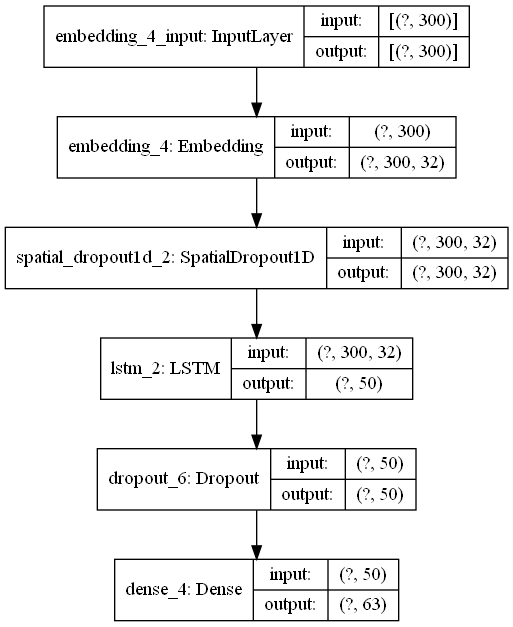

In [67]:
from tensorflow import keras
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [90]:
history = model.fit(padded_sequence,sentiment_label[0],
                  validation_split=0.2, epochs=40, batch_size=32)

Epoch 1/40
304/304 [==============================] - 97s 318ms/step - loss: 1.1801 - accuracy: 0.6459 - val_loss: 1.5064 - val_accuracy: 0.5658
Epoch 2/40
304/304 [==============================] - 94s 309ms/step - loss: 1.1511 - accuracy: 0.6565 - val_loss: 1.4719 - val_accuracy: 0.5868
Epoch 3/40
304/304 [==============================] - 92s 302ms/step - loss: 1.1391 - accuracy: 0.6570 - val_loss: 1.4344 - val_accuracy: 0.5992
Epoch 4/40
304/304 [==============================] - 94s 308ms/step - loss: 1.1074 - accuracy: 0.6696 - val_loss: 1.4485 - val_accuracy: 0.6016
Epoch 5/40
304/304 [==============================] - 97s 319ms/step - loss: 1.0945 - accuracy: 0.6723 - val_loss: 1.4401 - val_accuracy: 0.5934
Epoch 6/40
304/304 [==============================] - 77s 254ms/step - loss: 1.0838 - accuracy: 0.6793 - val_loss: 1.4253 - val_accuracy: 0.6070
Epoch 7/40
304/304 [==============================] - 79s 260ms/step - loss: 1.0468 - accuracy: 0.6849 - val_loss: 1.4328 - val_ac

### Salvar el modelo 

In [91]:
model.save('tickets_model/modelo_tickets') 

INFO:tensorflow:Assets written to: tickets_model/modelo_tickets\assets


### Probar el modelo

In [99]:
import numpy as np
test_word ="solicito se resetee mi contraseña ya que no me deja hacerlo manualmente"
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=500)
#prediction = int(model.predict(tw).round().item())
#sentiment_label[1][prediction]
#print(model.predict(tw))
pred=model.predict(tw)
y = np.argmax(pred, axis=1) # numpy must have been imported as np
print(np.argmax(pred, axis=0))
print (y)
sentiment_label[1][y]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[7]


Index(['Correo electrónico'], dtype='object')